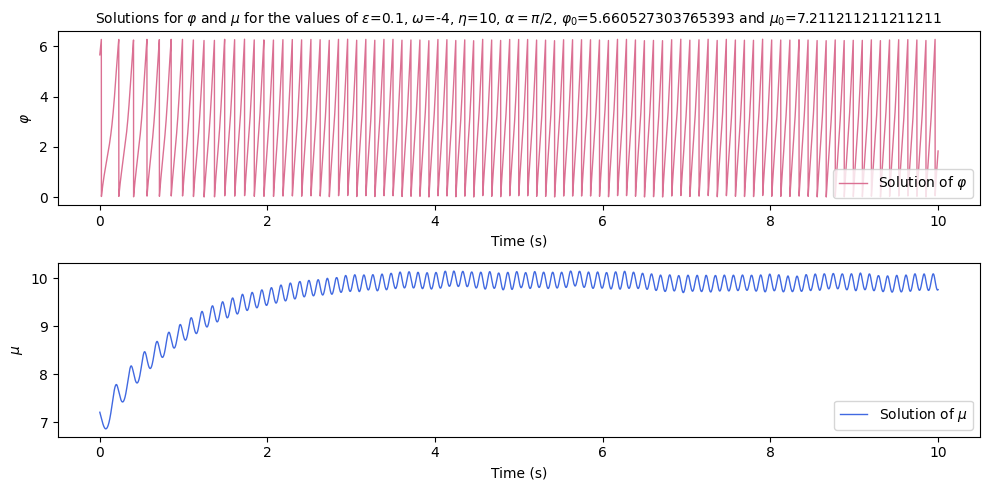

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt
from scipy.integrate import solve_ivp

def neuron_model(t, y, epsilon, omega, eta, alpha):
    """
    This is a function corresponding to the theta-neuron model.
    Vars:
        t: integer
        y: array
        epsilon: float
        omega: float
        eta: float
        alpha: float
    """
    phi, mu=y
    dphi_dt=(omega+mu-np.sin(phi))/epsilon
    dmu_dt=-mu+eta*(1-np.sin(phi+alpha))
    return [dphi_dt, dmu_dt]

#Set of parameters
epsilon=0.1
omega=-4
eta=10
alpha=np.pi/2
initial_conditions=[200*np.pi/111, 7204/999]  #Initial conditions
time_span=(0,10)
t_eval=np.linspace(time_span[0], time_span[1], 10000) #10000 evenly spaced time points between 0 and 30.


#We are selecting the first and second values of the initial conditions in order to use it in the title of the plot.
first_initial_condition=initial_conditions[0]
second_initial_condition=initial_conditions[1]

#Solving the ivp with LSODA and for the given time span and initial conditions
solution=solve_ivp(
    neuron_model,
    time_span,
    initial_conditions,
    args=(epsilon, omega, eta, alpha),
    t_eval=t_eval,
    method='LSODA'
)


#Plotting two plots, first plot of phi with respect to time and second plot of mu with respect to time.
t=solution.t
phi, mu=solution.y
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(t, np.mod(phi,2*np.pi), color='palevioletred',linewidth=1, label="Solution of $\\varphi$")
plt.title(f"Solutions for $\\varphi$ and $\\mu$ for the values of $\\epsilon$={epsilon}, $\\omega$={omega}, $\\eta$={eta}, $\\alpha=\\pi/2$, $\\varphi_0$={first_initial_condition} and $\\mu_0$={second_initial_condition} ", fontsize=10)
plt.xlabel('Time (s)', fontsize=10)
plt.ylabel('$\\varphi$', fontsize=10)
plt.legend(loc="lower right")
plt.subplot(2, 1, 2)
plt.plot(t, mu, color='royalblue',linewidth=1, label="Solution of $\\mu$")
plt.xlabel('Time (s)', fontsize=10)
plt.ylabel('$\\mu$', fontsize=10)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()
